## Encoder - Decoder
- LSTM -> state of the art for NLP -> berfore Transformers
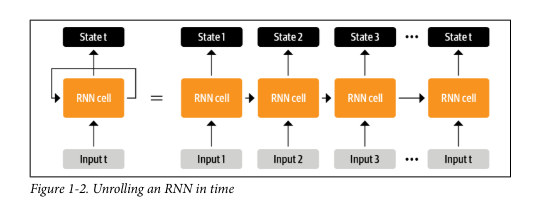
- Machine learning translator
- input -> numerical representation (last hidden state)-> decoder -> translated to second language

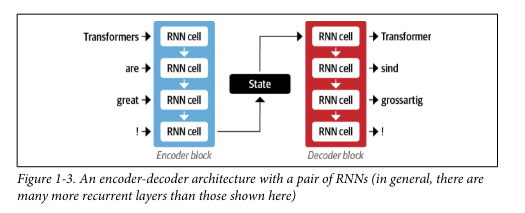

- encoder create infromation bottleneck

## Transformers
- Restnet
    - I/P -> Model body -> classification head -> O/p
    - transfer learning we re train the head
    - weights of the body remain unchanged
- used for less labelled data
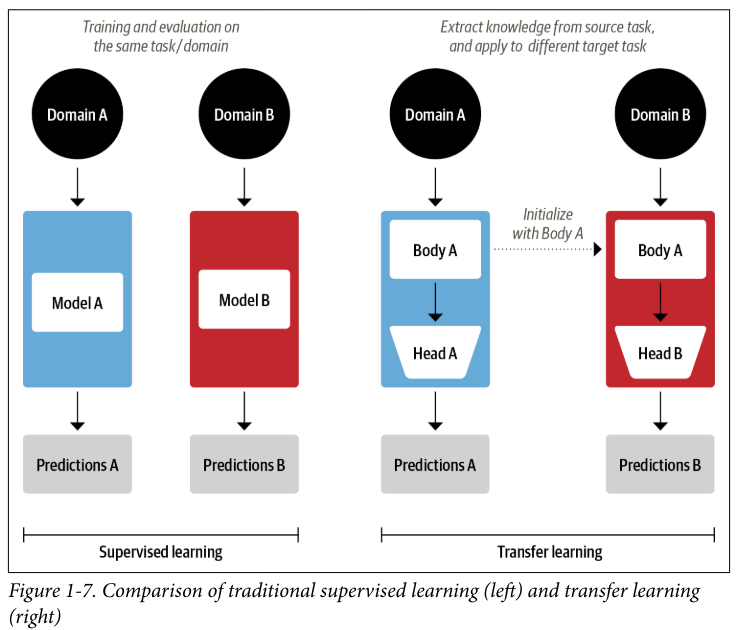

- NLP (ULMFiT Process)
    - pretraining
        - next word prediction
        - labelling not required
        - general data, web scrapped
    - domain adaptation
        - next word on specific data
        - eg: IMDB data for movie review
    - fine-tuning
        - classification layer training
        - domain specific data

## Hugging Face Transformers
- Pythorch / Tensorflow
- load pretrained weights
- standardized accross models (transformer models)

In [1]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure
from your online store in Germany. Unfortunately, when I opened the package,
I discovered to my horror that I had been sent an action figure of Megatron
instead! As a lifelong enemy of the Decepticons, I hope you can understand my
dilemma. To resolve the issue, I demand an exchange of Megatron for the
Optimus Prime figure I ordered. Enclosed are copies of my records concerning
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

In [2]:
from transformers import pipeline
import pandas as pd

classifier = pipeline('text-classification')

output = classifier(text)
pd.DataFrame(output)


2024-05-01 13:25:34.709720: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-05-01 13:25:34.709740: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


,label,score
0,NEGATIVE,0.901546


- pipeline loads weights from Hugging Face Hub

## Named Entity Recognition

In [4]:
ner_tagger = pipeline('ner', aggregation_strategy='simple')
outputs = ner_tagger(text)
pd.DataFrame(outputs)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


,entity_group,score,word,start,end
0,ORG,0.879010,Amazon,5,11
1,MISC,0.990859,Optimus Prime,36,49
2,LOC,0.999755,Germany,90,97
3,MISC,0.556570,Mega,208,212
4,PER,0.590256,##tron,212,216
5,ORG,0.669692,Decept,253,259
6,MISC,0.498349,##icons,259,264
7,MISC,0.775362,Megatron,350,358
8,MISC,0.987854,Optimus Prime,367,380
9,PER,0.812096,Bumblebee,502,511


- ORG: organization
- LOC: location
- PER: Person
- aggregation_stragegy: use multiple words to singel entity
    - Optimus Prime as MISC
- `## words`: tokens
    - here -> ##tron

## Question Answering

In [5]:
reader = pipeline("question-answering")
question = "What does the customer want?"
outputs = reader(question=question, context=text)
pd.DataFrame([outputs])

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


,score,start,end,answer
0,0.631292,335,358,an exchange of Megatron


## Summarization

In [7]:
summarizer = pipeline("summarization")
outputs = summarizer(text, max_length=60, clean_up_tokenization_spaces=True)
print(outputs[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


 Bumblebee ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead. As a lifelong enemy of the Decepticons, I hope you can understand


## Translation

In [3]:
translator = pipeline("translation_en_to_de", model="Helsinki-NLP/opus-mt-en-de")
outputs = translator(text, clean_up_tokenization_spaces=True, min_length=100)
print(outputs[0]['translation_text'])

/home/aneesh/python/lib/python3.10/site-packages/transformers/models/marian/tokenization_marian.py:198: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Sehr geehrter Amazon, letzte Woche habe ich eine Optimus Prime Action Figur aus Ihrem Online-Shop in Deutschland bestellt. Leider, als ich das Paket öffnete, entdeckte ich zu meinem Entsetzen, dass ich stattdessen eine Action Figur von Megatron geschickt worden war! Als lebenslanger Feind der Decepticons, Ich hoffe, Sie können mein Dilemma verstehen. Um das Problem zu lösen, Ich fordere einen Austausch von Megatron für die Optimus Prime Figur habe ich bestellt. Anbei sind Kopien meiner Aufzeichnungen über diesen Kauf. Ich erwarte, bald von Ihnen zu hören. Aufrichtig, Bumblebee.


## Text Generation
- Automatic reply

In [5]:
generator = pipeline("text-generation")
response = "Dear Bumblebee, I am sorry to hear that your order was mixed up."
prompt = text + "\n\nCustomer service response:\n" + response
outputs = generator(prompt, max_length=200)
print(outputs[0]['generated_text'])

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Dear Amazon, last week I ordered an Optimus Prime action figure
from your online store in Germany. Unfortunately, when I opened the package,
I discovered to my horror that I had been sent an action figure of Megatron
instead! As a lifelong enemy of the Decepticons, I hope you can understand my
dilemma. To resolve the issue, I demand an exchange of Megatron for the
Optimus Prime figure I ordered. Enclosed are copies of my records concerning
this purchase. I expect to hear from you soon. Sincerely, Bumblebee.

Customer service response:
Dear Bumblebee, I am sorry to hear that your order was mixed up. All I can say is,


As a customer, I always welcome your customers. Unfortunately, you have caused me to lose many customers by email.

I think I will address the problem in a future message.


Sincerely,


G.M.





## Hugging Face Echosystem
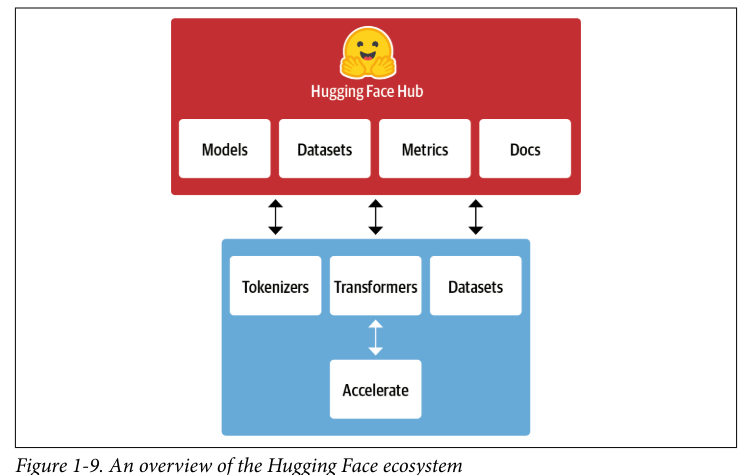

### Hugging Face Hub
- 20K models available
- https://huggingface.co/models

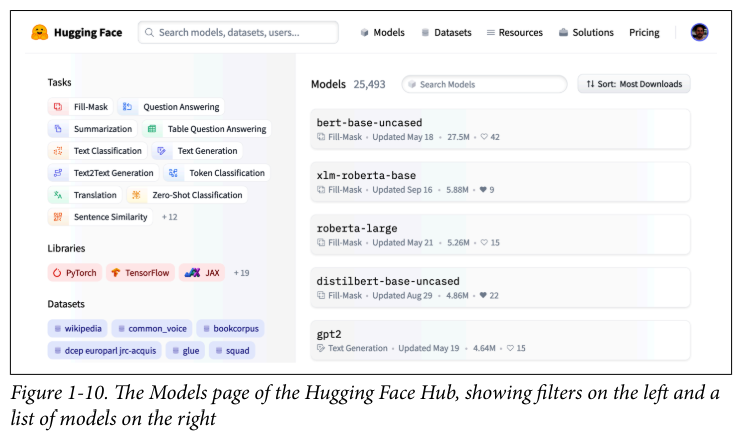

- can try model 
    - data cards
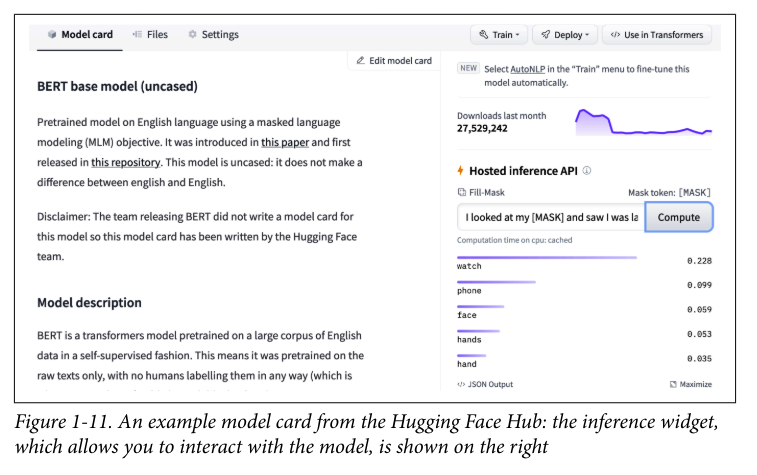

### Tokenizer
### Hugging face datasets
- 1000 of data set
- large data -> memoery mapping: not fit into RAM
- inter operable with other libs -> pandas, Numpy
- metrics to evaluate the model

### Hugging facre accelerate
- extra layer of abstraction
- to take care of the infrastructure on the code is running
    - local machine -> cloud 